In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [183]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/UPL.csv")

In [184]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-01-23,UNIPHOS,EQ,10.00,100.0,560.0,100.0,555.1,553.80,483.69,73629,3.561361e+12,NaN,52799.0,0.7171
1,2004-01-27,UNIPHOS,EQ,553.80,570.0,570.0,525.0,530.1,540.35,540.77,26737,1.445851e+12,NaN,17314.0,0.6476
2,2004-01-28,UNIPHOS,EQ,540.35,530.0,565.0,511.0,542.0,538.85,542.24,32155,1.743569e+12,NaN,23285.0,0.7241
3,2004-01-29,UNIPHOS,EQ,538.85,530.0,543.5,504.0,517.0,515.10,529.23,19074,1.009447e+12,NaN,12935.0,0.6781
4,2004-01-30,UNIPHOS,EQ,515.10,519.0,519.0,471.4,485.0,482.95,485.85,23807,1.156659e+12,NaN,12750.0,0.5356


In [185]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4287 non-null   object 
 1   Symbol              4287 non-null   object 
 2   Series              4287 non-null   object 
 3   Prev Close          4287 non-null   float64
 4   Open                4287 non-null   float64
 5   High                4287 non-null   float64
 6   Low                 4287 non-null   float64
 7   Last                4287 non-null   float64
 8   Close               4287 non-null   float64
 9   VWAP                4287 non-null   float64
 10  Volume              4287 non-null   int64  
 11  Turnover            4287 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4281 non-null   float64
 14  %Deliverble         4281 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 502.5

In [186]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4.287000e+03,4.287000e+03,2456.000000,4.281000e+03,4281.000000
mean,403.192151,403.596279,411.002927,396.025064,403.290320,403.331386,403.690133,1.692215e+06,7.369939e+13,43472.249593,7.064405e+05,0.558502
std,242.503045,242.792103,245.662113,239.380109,242.394231,242.448589,242.475362,2.880158e+06,1.434760e+14,41826.382086,9.106659e+05,0.203112
min,10.000000,72.500000,76.000000,71.500000,73.500000,74.150000,75.020000,2.500000e+02,1.209481e+10,535.000000,1.740000e+02,0.080900
25%,167.850000,168.700000,172.450000,165.150000,168.000000,168.000000,168.870000,3.144830e+05,6.607107e+12,20212.750000,1.869020e+05,0.413800
50%,338.450000,339.000000,345.100000,331.400000,339.000000,338.500000,338.260000,1.044446e+06,2.501376e+13,32820.000000,5.086170e+05,0.550800
75%,596.825000,599.275000,608.650000,587.875000,597.600000,597.000000,598.680000,1.957141e+06,8.824685e+13,54394.500000,9.300740e+05,0.701900
max,1034.500000,1030.250000,1043.750000,1017.250000,1030.250000,1034.500000,1031.960000,8.727905e+07,3.773965e+15,869118.000000,2.409247e+07,1.000000


In [187]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [188]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [189]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [190]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [191]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [192]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [193]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
4282,2.048131,0.604667,590.65,3162291,NaN
4283,2.680692,1.074268,597.45,4496811,NaN
4284,2.079175,0.845841,608.05,4983043,NaN
4285,1.836668,0.391262,615.80,6257014,NaN
4286,2.806059,-0.638507,606.90,3072295,NaN


In [194]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [195]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [196]:
#Define the prediction model
model = RandomForestRegressor()

In [197]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [198]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9596458020987723


In [199]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [200]:
predictions = model.predict(X_Check)

In [201]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

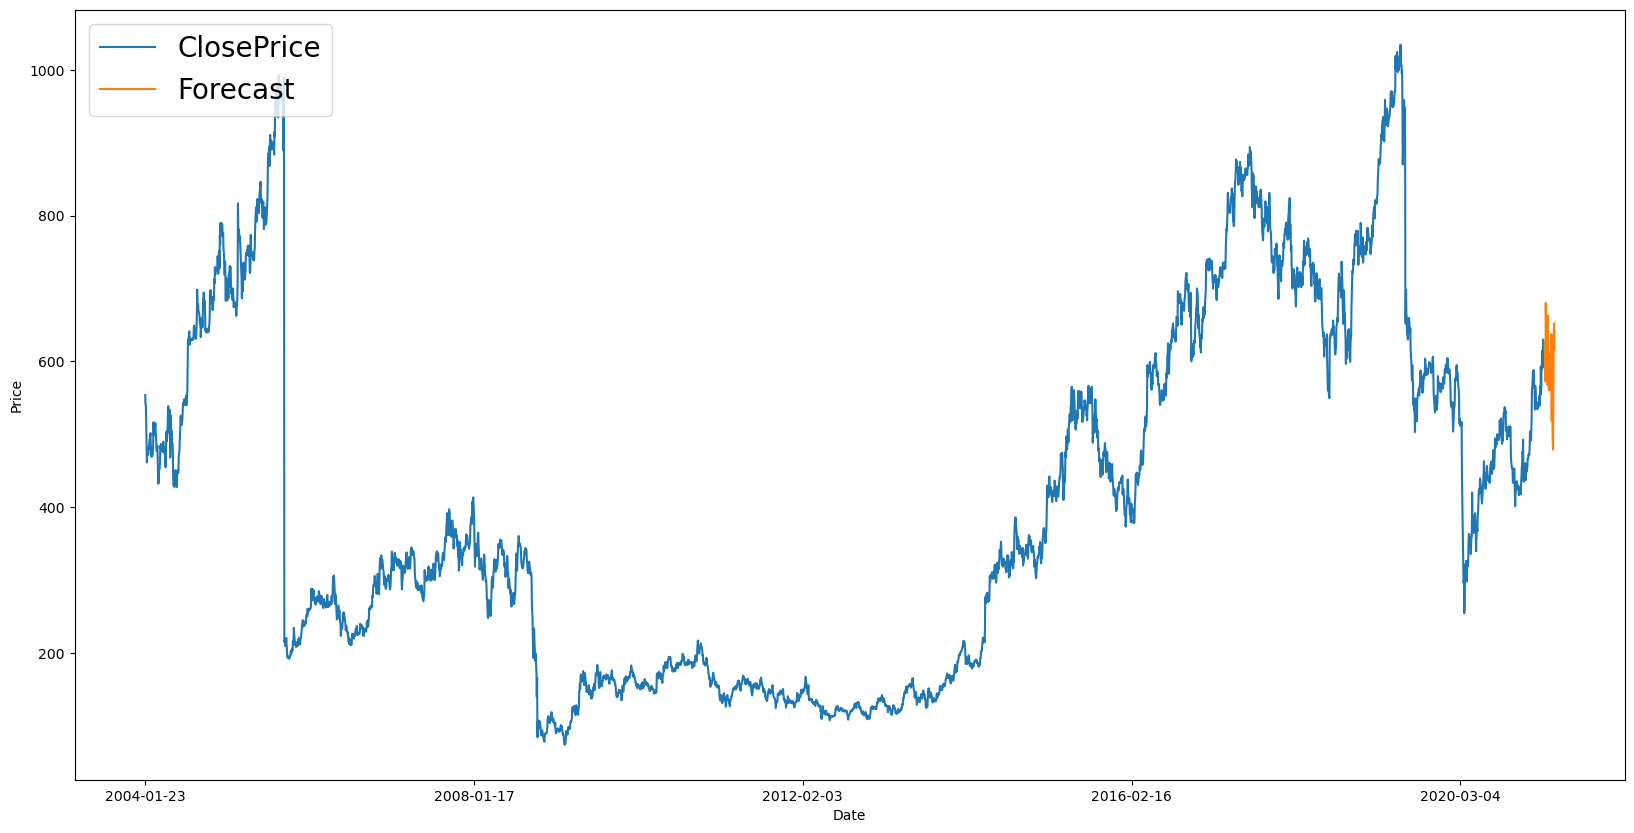

In [202]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')